In [214]:
import os
import pandas as pd
import cv2
import numpy as np
import json

from keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.model_selection import cross_val_score

In [57]:
df_test = pd.read_csv('experiment/data/test_image_path.csv')
df_test.head()

,image_path,class
0,test/images/PA/PA__290__339_03_20-29.png,3
1,test/images/RO/RO__245__338_09_30-39.png,1
2,test/images/RN/RN__286__339_03_10-19.png,2
3,test/images/RJ/RJ__284__339_11_10-19.png,2
4,test/images/RN/RN__292__338_14_40-49.png,4


In [83]:
X = []
y = []
for i, row in df_test.iterrows():
    filepath = os.path.join('experiment/data/', row['image_path'])
    X.append(cv2.imread(filepath, 0))
    y.append(int(row['class']))
y = np.array(y)
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
X = X.astype('float32')/255 #normalize

X.shape #(rows, width, cols, channels)

(1033, 128, 128, 1)

In [97]:
model = load_model('experiment/best_model/CNN_Final_82_model_BEST.h5')
history = dict()
with open('experiment/best_model/history_BEST.json', 'r') as file:
    history = json.loads(file.read())

In [228]:
len(loss)

159

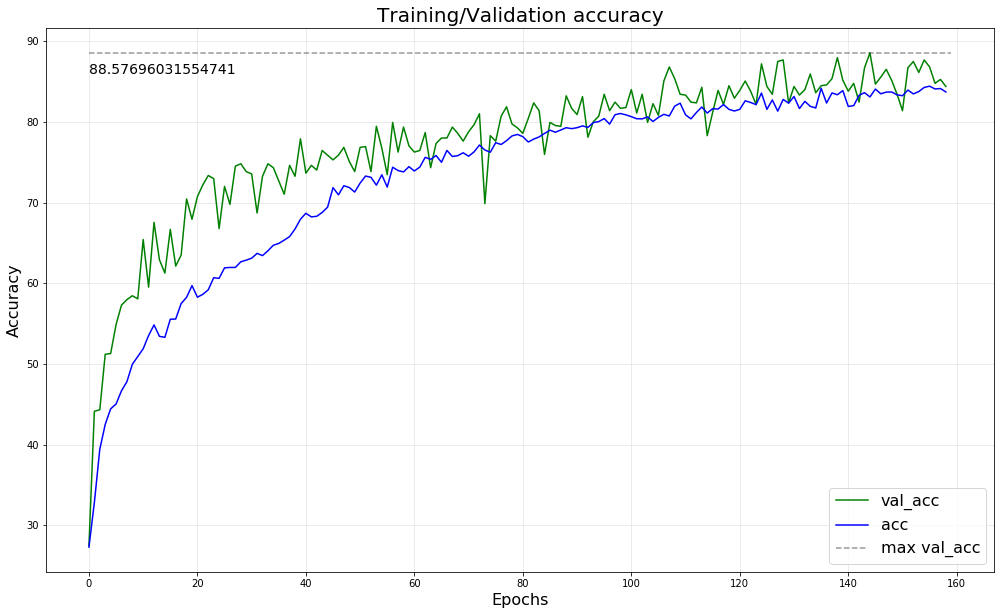

In [209]:
loss, val_loss = np.array(history['loss']), np.array(history['val_loss'])
acc, val_acc = np.array(history['acc']), np.array(history['val_acc'])

fig, ax = plt.subplots(1, 1, figsize=(17, 10))

ax.plot(val_acc*100, label='val_acc', color='green')
ax.plot(acc*100, label='acc', color='blue')
ax.plot([0, len(val_acc)], [np.max(val_acc*100), np.max(val_acc*100)], 
           color='k', linestyle='--', alpha=.4, label='max val_acc')
ax.text(0, 86, np.max(val_acc)*100, alpha=1, fontdict=dict(size=14))
ax.legend(fontsize=16)
ax.grid(alpha=.3)
ax.set_title('Training/Validation accuracy', fontdict=dict(size=20))
ax.set_xlabel('Epochs', fontdict=dict(size=16))
ax.set_ylabel('Accuracy', fontdict=dict(size=16))

plt.savefig('results/accuracy_model.png', dpi=100, bbox_inches='tight', transparent="False", pad_inches=0.1)

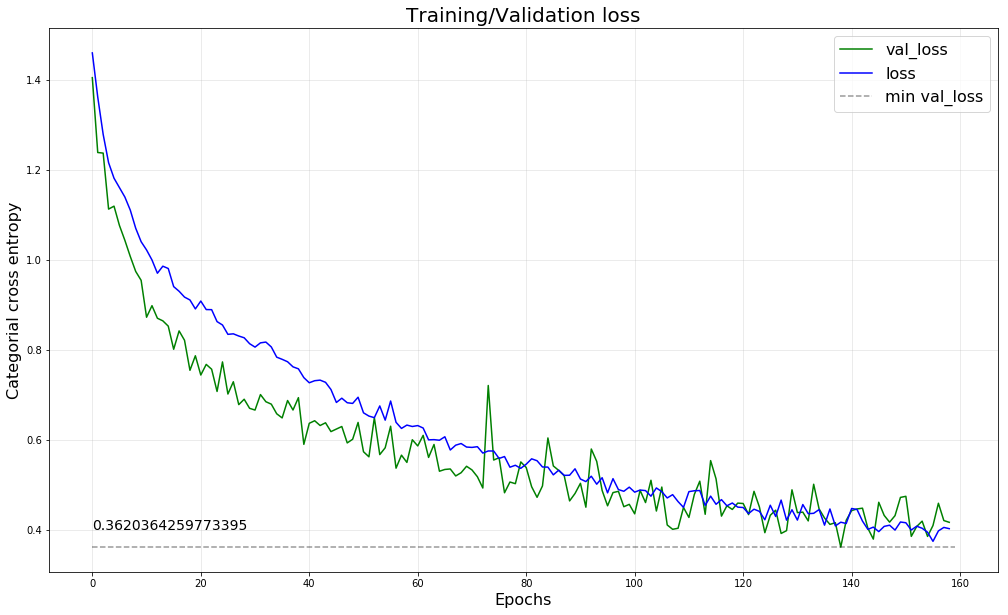

In [208]:
loss, val_loss = np.array(history['loss']), np.array(history['val_loss'])
acc, val_acc = np.array(history['acc']), np.array(history['val_acc'])

fig, ax = plt.subplots(1, 1, figsize=(17, 10))

ax.plot(val_loss, label='val_loss', color='green')
ax.plot(loss, label='loss', color='blue')
ax.plot([0, len(val_loss)], [np.min(val_loss), np.min(val_loss)], 
           color='k', linestyle='--', alpha=.4, label='min val_loss')
ax.text(0, 0.4, np.min(val_loss), alpha=1, fontdict=dict(size=14))
ax.legend(fontsize=16)
ax.grid(alpha=.3)
ax.set_title('Training/Validation loss', fontdict=dict(size=20))
ax.set_xlabel('Epochs', fontdict=dict(size=16))
ax.set_ylabel('Categorial cross entropy', fontdict=dict(size=16))

plt.savefig('results/loss_model.png', dpi=100, bbox_inches='tight', transparent="False", pad_inches=0.1)

In [234]:
val_acc.mean()

0.7727264425839132

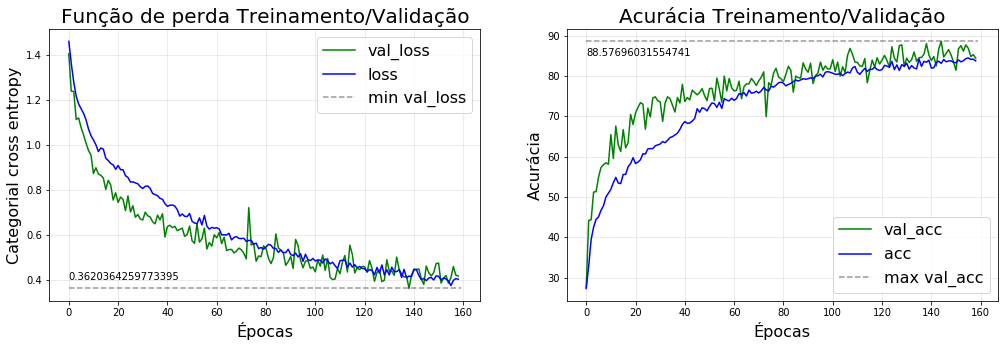

In [232]:
loss, val_loss = np.array(history['loss']), np.array(history['val_loss'])
acc, val_acc = np.array(history['acc']), np.array(history['val_acc'])

fig, ax = plt.subplots(1, 2, figsize=(17, 5))

ax[0].plot(val_loss, label='val_loss', color='green')
ax[0].plot(loss, label='loss', color='blue')
ax[0].plot([0, len(val_loss)], [np.min(val_loss), np.min(val_loss)], 
           color='k', linestyle='--', alpha=.4, label='min val_loss')
ax[0].text(0, 0.4, np.min(val_loss), alpha=1)
ax[0].legend(fontsize=16)
ax[0].grid(alpha=.3)
ax[0].set_title('Função de perda Treinamento/Validação', fontdict=dict(size=20))
ax[0].set_xlabel('Épocas', fontdict=dict(size=16))
ax[0].set_ylabel('Categorial cross entropy', fontdict=dict(size=16))


ax[1].plot(val_acc*100, label='val_acc', color='green')
ax[1].plot(acc*100, label='acc', color='blue')
ax[1].plot([0, len(val_acc)], [np.max(val_acc*100), np.max(val_acc*100)], 
           color='k', linestyle='--', alpha=.4, label='max val_acc')
ax[1].text(0, 85, np.max(val_acc)*100, alpha=1)
ax[1].legend(fontsize=16)
ax[1].grid(alpha=.3)
ax[1].set_title('Acurácia Treinamento/Validação', fontdict=dict(size=20))
ax[1].set_xlabel('Épocas', fontdict=dict(size=16))
ax[1].set_ylabel('Acurácia', fontdict=dict(size=16))

plt.savefig('results/loss_accuracy_model_PT.pdf', dpi=600, bbox_inches='tight', transparent="False", pad_inches=0.1)

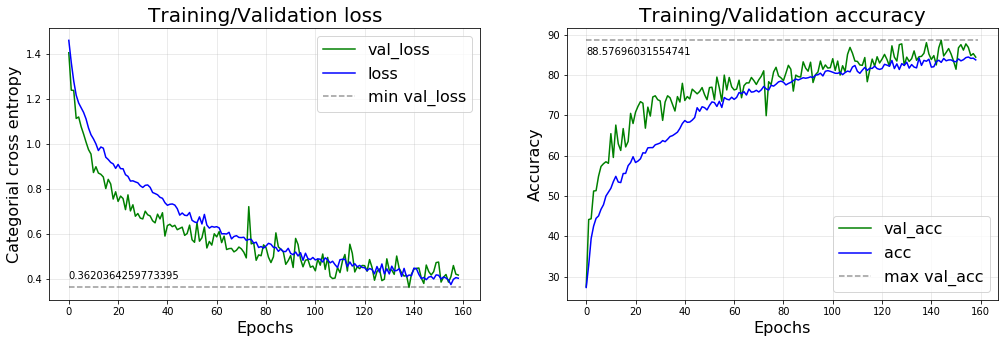

In [199]:
loss, val_loss = np.array(history['loss']), np.array(history['val_loss'])
acc, val_acc = np.array(history['acc']), np.array(history['val_acc'])

fig, ax = plt.subplots(1, 2, figsize=(17, 5))

ax[0].plot(val_loss, label='val_loss', color='green')
ax[0].plot(loss, label='loss', color='blue')
ax[0].plot([0, len(val_loss)], [np.min(val_loss), np.min(val_loss)], 
           color='k', linestyle='--', alpha=.4, label='min val_loss')
ax[0].text(0, 0.4, np.min(val_loss), alpha=1)
ax[0].legend(fontsize=16)
ax[0].grid(alpha=.3)
ax[0].set_title('Training/Validation loss', fontdict=dict(size=20))
ax[0].set_xlabel('Epochs', fontdict=dict(size=16))
ax[0].set_ylabel('Categorial cross entropy', fontdict=dict(size=16))


ax[1].plot(val_acc*100, label='val_acc', color='green')
ax[1].plot(acc*100, label='acc', color='blue')
ax[1].plot([0, len(val_acc)], [np.max(val_acc*100), np.max(val_acc*100)], 
           color='k', linestyle='--', alpha=.4, label='max val_acc')
ax[1].text(0, 85, np.max(val_acc)*100, alpha=1)
ax[1].legend(fontsize=16)
ax[1].grid(alpha=.3)
ax[1].set_title('Training/Validation accuracy', fontdict=dict(size=20))
ax[1].set_xlabel('Epochs', fontdict=dict(size=16))
ax[1].set_ylabel('Accuracy', fontdict=dict(size=16))

plt.savefig('results/loss_accuracy_model.png', dpi=600, bbox_inches='tight', transparent="False", pad_inches=0.1)

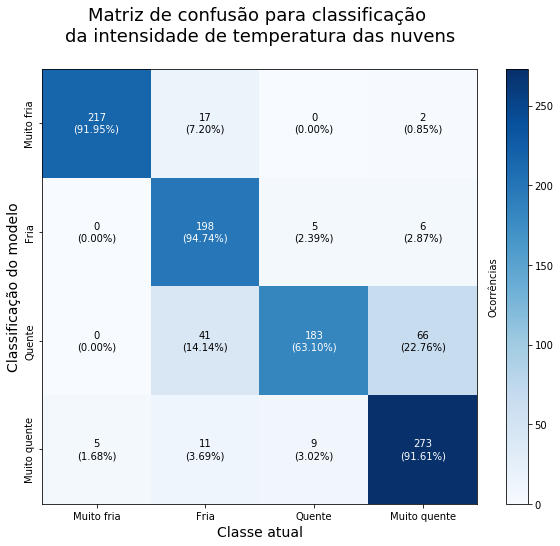

In [240]:
pred = model.predict(X).argmax(axis=1)
cm = confusion_matrix(y, pred)
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Muito fria', 'Fria', 'Quente', 'Muito quente']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     ax.set_title('Matriz de confusão para %d testes'%((n*2)*0.2), fontdict=title_font)
ax.set_xlabel('Classe atual', fontdict=label_font)
ax.set_ylabel('Classificação do modelo', fontdict=label_font)
cb.ax.set_ylabel('Ocorrências', va='center', rotation=-270, labelpad=-60)
ax.set_title('Matriz de confusão para classificação \nda intensidade de temperatura das nuvens', fontdict=title_font)

plt.savefig('results/confusion_matrix_blue_PT.pdf', dpi=600, \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
plt.show()

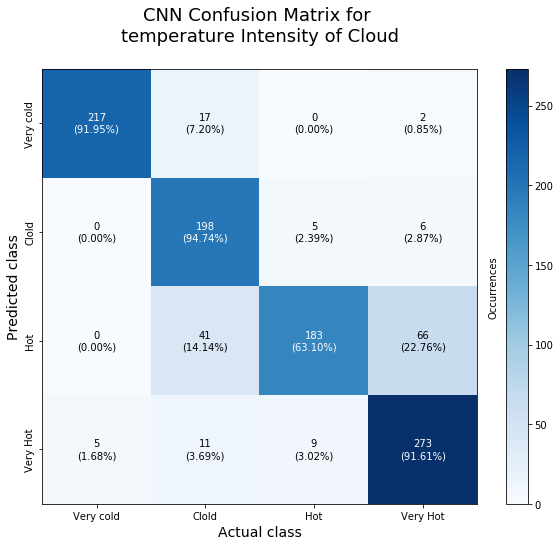

In [212]:
pred = model.predict(X).argmax(axis=1)
cm = confusion_matrix(y, pred)
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Very cold', 'Clold', 'Hot', 'Very Hot']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     ax.set_title('Matriz de confusão para %d testes'%((n*2)*0.2), fontdict=title_font)
ax.set_xlabel('Actual class', fontdict=label_font)
ax.set_ylabel('Predicted class', fontdict=label_font)
cb.ax.set_ylabel('Occurrences', va='center', rotation=-270, labelpad=-60)
ax.set_title('CNN Confusion Matrix for \ntemperature Intensity of Cloud', fontdict=title_font)

plt.savefig('results/confusion_matrix_blue.png', dpi=300, \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
plt.show()274.15 kelvin

In [223]:
diag = []
ndiag = []

for i in range(4):
    for j in range(4):
        if i == j:
            diag.append(cm[i][j])
        else:
            ndiag.append(cm[i][j])
diag = np.array(diag)
ndiag = np.array(ndiag)

diag.sum()/cm.sum()

0.8431752178121975

In [227]:
cm[0][0]/sum(cm[0])

0.9194915254237288